Tanishq

AIML B2

21070126098

In [ ]:
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
import spacy
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.9 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download("all")
!python -m spacy download en_core_web_sm

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

2023-09-02 08:32:24.157525: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.utils import to_categorical

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
data=pd.read_csv('/content/train.csv')
data

,Class_Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119994,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119995,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119996,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119997,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [ ]:
len(data)

119999

In [ ]:
data.dropna(inplace = True)
data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)

In [ ]:
#Regular Expression
regexp = RegexpTokenizer("[\w']+")

##Text Preprocessing

In [ ]:
#Lowercase
def text_lower(text):
  text = text.lower()
  return text

In [ ]:
#Remove Whitespace
def remove_whitespace(text):
  text = text.strip()
  return text

In [ ]:
#Remove Punctuation
def remove_punctuation(text):
  punct = string.punctuation
  punct = punct.replace("'","")
  text = text.translate(str.maketrans("", "",punct))
  return text

In [ ]:
#Remove HTML
def remove_html(text):
  html = re.compile(r'<.*?>')
  text = html.sub(r'',text)
  return text

In [ ]:
# Removing emojis
def remove_emoji(text):
  emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+",flags=re.UNICODE
  )
  text = emoji_pattern.sub(r'',text)
  return text

In [ ]:
#Remove URLS
def remove_http_links(text):
  text = re.sub('http://\S+|https://\S+','',text)
  return text

In [ ]:
#Convert Contractions like you're
def convert_contractions(text):
  text = contractions.fix(text)
  return text

In [ ]:
#Remove Stopwords
def remove_stopwords(text):
  text = " ".join([word for word in nltk.tokenize.word_tokenize(text) if word not in stopwords.words('english')])
  return text

In [ ]:
#Lemmatization

# Lemmatization
nlp = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])

def lemmatize(text):
  text = " ".join([token.lemma_ for token in nlp(text)])
  return text

In [ ]:
#Remove Non-Alphabetic Characters
def discard_non_alpha(text):
  word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
  text = " ".join(word_list_non_alpha)
  return text

#Applying All definitions

In [1]:
def text_clean(text):
  text = text_lower(text)
  text = remove_whitespace(text)
  text = re.sub('\n' , '', text)
  text = re.sub('\[.*?\]', '', text)
  text = remove_http_links(text)
  text = remove_punctuation(text)
  text = remove_html(text)
  text = remove_emoji(text)

  text = convert_contractions(text)
  text = remove_stopwords(text)
  text = discard_non_alpha(text)
  text = lemmatize(text)

  return text

# Using the + operator

In [ ]:
data['Merged_Column'] = data['Title'] + data['Description']

In [ ]:
data['Merged_Column'] = data['Merged_Column'].apply(text_clean)
data.head()

,Class_Index,Title,Description,Merged_Column
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st bear claw back black reutersreuter sho...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyle look toward commercial aerospace reute...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil economy cloud stock outlook reutersreuter ...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halt oil export main southern pipeline re...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",oil price soar alltime record pose new menace ...


# Replace all 1 with 0 and all 2 with 1 in 'Column1'

In [ ]:
data['Class_Index'] = data['Class_Index'].replace({1: 0, 2: 1, 3: 2, 4: 3})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.Merged_Column,
    data.Class_Index,
    test_size=0.2,
    stratify=data.Class_Index,
    random_state=2)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

In [ ]:
batch_size = 4
max_words = 10000
max_len = 50
embedding_dim = 50
lstm_units = 32

In [ ]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seqs = tok.texts_to_sequences(X_train)
test_seqs = tok.texts_to_sequences(X_test)
seq_matrix = sequence.pad_sequences(seqs,max_len)
test_seq_matrix = sequence.pad_sequences(test_seqs,max_len)

In [ ]:
seq_matrix[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        889,    6,   38, 1784,  261, 4684,  148,  658, 1990, 1784,  104,
       5363,  595,  338,  179,  501,   93,   14,    6,   38, 3081,  261,
         91,  833, 1040, 2818,  104,  511], dtype=int32)

In [ ]:
def LSTM_Model(words,len,dim,units,num_labels):
  model = tf.keras.Sequential()
  model.add(Embedding(input_dim=words, output_dim=dim ,input_length=len))
  model.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(num_labels, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
model = LSTM_Model(max_words,max_len,embedding_dim,lstm_units,(data['Class_Index'].nunique()))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            500000    
                                                                 
 lstm (LSTM)                 (None, 32)                10624     
                                                                 
 dense (Dense)               (None, 4)                 132       
                                                                 
Total params: 510,756
Trainable params: 510,756
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(seq_matrix,y_train,epochs=3,batch_size=batch_size,validation_split=0.2)

Epoch 1/3
19197/19197 [==============================] - 1184s 61ms/step - loss: 0.3436 - accuracy: 0.8842 - val_loss: 0.2631 - val_accuracy: 0.9122
Epoch 2/3
19197/19197 [==============================] - 1170s 61ms/step - loss: 0.2348 - accuracy: 0.9220 - val_loss: 0.2486 - val_accuracy: 0.9182
Epoch 3/3
19197/19197 [==============================] - 1163s 61ms/step - loss: 0.1896 - accuracy: 0.9359 - val_loss: 0.2566 - val_accuracy: 0.9149


In [ ]:
prediction = model.predict(test_seq_matrix)

750/750 [==============================] - 6s 8ms/step


In [ ]:
target_labels = ["0", "1", "2", "3"]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,np.argmax(prediction,axis=1),target_names = target_labels))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6000
           1       0.96      0.97      0.97      6000
           2       0.87      0.89      0.88      5999
           3       0.89      0.88      0.89      5997

    accuracy                           0.91     23996
   macro avg       0.91      0.91      0.91     23996
weighted avg       0.91      0.91      0.91     23996



<Axes: >

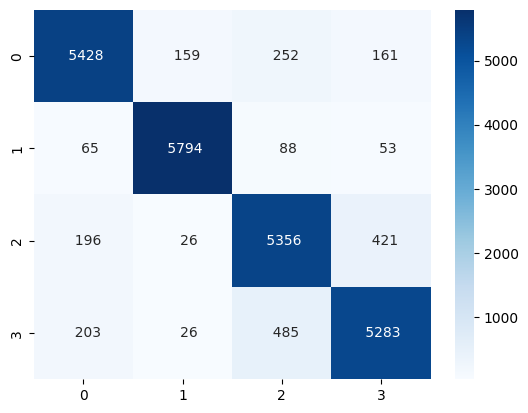

In [ ]:
sns.heatmap(confusion_matrix(y_test,np.argmax(prediction,axis=1)),annot=True,fmt='5',cmap='Blues',xticklabels=target_labels,yticklabels=target_labels)

In [ ]:
batch_size = 8
max_words = 25000
max_len = 30
embedding_dim = 30
lstm_units = 32

In [ ]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seqs = tok.texts_to_sequences(X_train)
test_seqs = tok.texts_to_sequences(X_test)
seq_matrix = sequence.pad_sequences(seqs,max_len)
test_seq_matrix = sequence.pad_sequences(test_seqs,max_len)

In [ ]:
def LSTM_Model(words,len,dim,units,num_labels):
  model = tf.keras.Sequential()
  model.add(Embedding(input_dim=words, output_dim=dim ,input_length=len))
  model.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))

  model.add(Dense(num_labels, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
model = LSTM_Model(max_words,max_len,embedding_dim,lstm_units,data['Class_Index'].nunique())

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 30)            750000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8064      
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 758,196
Trainable params: 758,196
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(seq_matrix,y_train,epochs=3,batch_size=batch_size,validation_split=0.2)

Epoch 1/3
9599/9599 [==============================] - 429s 44ms/step - loss: 0.3512 - accuracy: 0.8809 - val_loss: 0.2748 - val_accuracy: 0.9102
Epoch 2/3
9599/9599 [==============================] - 418s 44ms/step - loss: 0.2239 - accuracy: 0.9272 - val_loss: 0.2564 - val_accuracy: 0.9147
Epoch 3/3
9599/9599 [==============================] - 418s 43ms/step - loss: 0.1785 - accuracy: 0.9397 - val_loss: 0.2708 - val_accuracy: 0.9115


In [ ]:
prediction = model.predict(test_seq_matrix)

750/750 [==============================] - 6s 7ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,np.argmax(prediction,axis=1),target_names=target_labels))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6000
           1       0.95      0.98      0.96      6000
           2       0.89      0.86      0.88      5999
           3       0.88      0.90      0.89      5997

    accuracy                           0.91     23996
   macro avg       0.91      0.91      0.91     23996
weighted avg       0.91      0.91      0.91     23996



<Axes: >

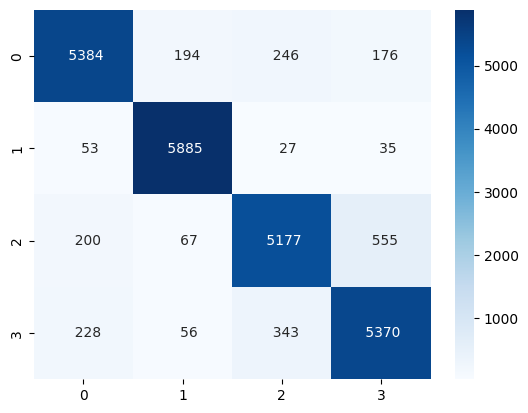

In [ ]:
sns.heatmap(confusion_matrix(y_test,np.argmax(prediction,axis=1)),annot=True,fmt='5',cmap='Blues',xticklabels=target_labels,yticklabels=target_labels)